In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [3]:
data=pd.read_csv( "Instagram data.csv", encoding='latin1')

In [4]:
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [13]:
!pip install --upgrade seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 651.6 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 952.6 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 2

In [14]:
import seaborn as sns 

C:\Users\yneem\AppData\Local\Temp\ipykernel_17968\3255906533.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


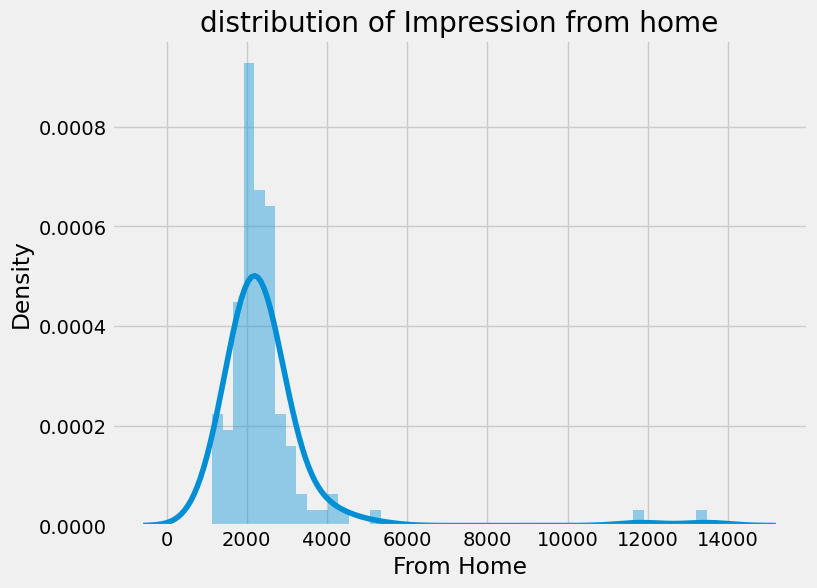

In [15]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.title('distribution of Impression from home')
sns.distplot(data['From Home'])
plt.show()

C:\Users\yneem\AppData\Local\Temp\ipykernel_17968\1227651849.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


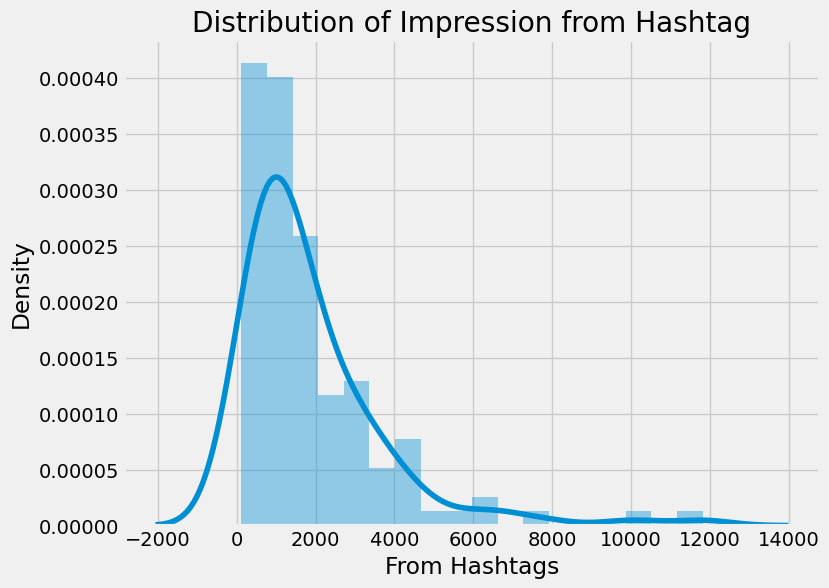

In [16]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Impression from Hashtag')
sns.distplot(data['From Hashtags'])
plt.show()

C:\Users\yneem\AppData\Local\Temp\ipykernel_17968\3235001061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


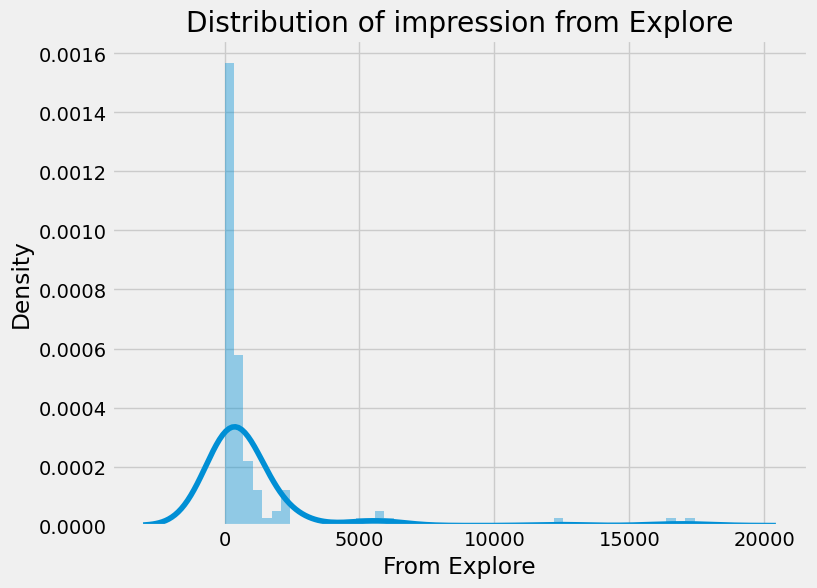

In [17]:
plt.figure(figsize=(8,6))
plt.title('Distribution of impression from Explore')
sns.distplot(data['From Explore'])
plt.show()

In [18]:
home=data['From Home'].sum()
hashtag=data['From Hashtags'].sum()
explore=data['From Explore'].sum()
other=data['From Other'].sum()
labels=['From Home', 'From Hashtag', 'From Explore', 'from Other']
values=[home, hashtag, explore, other]
fig=px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

In [19]:
figure=px.scatter(data_frame=data,
                 x='Impressions',
                 y='Likes',
                 size='Likes',
                 trendline='ols',
                 title='Relationship b/w Impressions and Likes')
figure.show()

In [20]:
figure=px.scatter(data_frame=data,
                 x='Impressions',
                 y='Comments',
                 size='Comments',
                 trendline='ols',
                 title='Relationship b/w Impressions and Comments')
figure.show()

In [21]:
figure=px.scatter(data_frame=data,
                 x='Impressions',
                 y='Shares',
                 size='Shares',
                 trendline='ols',
                 title='Relationship b/w Impressions and Shares')
figure.show()

In [22]:
figure=px.scatter(data_frame=data,
                 x='Impressions',
                 y='Saves',
                 size='Saves',
                 trendline='ols',
                 title='Relationship b/w Impressions and Saves')
figure.show()

In [23]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668
